In [52]:
%env KERAS_BACKEND=tensorflow

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
from ipywidgets import interact_manual

# Keras functions
from keras.models import Sequential, Model
from keras.layers import Input, Lambda, concatenate
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose, UpSampling2D
from keras.optimizers import SGD, Adam
from keras import metrics

# Keras dataset
from keras.datasets import mnist

# Keras utilis function
from keras.utils import np_utils

from keras import backend as K

env: KERAS_BACKEND=tensorflow


In [2]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

x_train = x_train0.reshape(60000, -1)
x_test = x_test0.reshape(10000, -1)

x_train -= x_train.min()
x_train = x_train/x_train.max()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(2,), mean=0., stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

def vae_loss(x, x_recon):  
    recovery_loss = 784 * metrics.binary_crossentropy(x, x_recon)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return recovery_loss + kl_loss


enc_1 = Dense(100, activation='sigmoid')
# enc_2 = Dense(2, activation='sigmoid')

enc_mean = Dense(2)
enc_log_var = Dense(2)

dec_2 = Dense(100, activation='sigmoid')
dec_1 = Dense(784, activation='sigmoid')

x = Input(shape=(784,))
enc_x = enc_1(x)

z_mean = enc_mean(enc_x)
z_log_var = enc_log_var(enc_x)

z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
dec_x = dec_2(z)
x_hat = dec_1(dec_x)
VAE = Model(x, x_hat)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            202         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            202         dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

In [0]:
VAE.compile(loss=vae_loss, optimizer=Adam())


先取batch_size=1024 大致train一下

In [7]:
VAE.fit(x_train, x_train, batch_size=1024, epochs=80)

Epoch 1/80
60000/60000 [==============================] - 5s 83us/step - loss: 161.2646
Epoch 2/80
60000/60000 [==============================] - 4s 73us/step - loss: 161.0784
Epoch 3/80
60000/60000 [==============================] - 4s 74us/step - loss: 160.4563
Epoch 4/80
60000/60000 [==============================] - 4s 74us/step - loss: 160.4867
Epoch 5/80
60000/60000 [==============================] - 4s 73us/step - loss: 160.3808
Epoch 6/80
60000/60000 [==============================] - 4s 74us/step - loss: 160.5244
Epoch 7/80
60000/60000 [==============================] - 4s 73us/step - loss: 160.6491
Epoch 8/80
60000/60000 [==============================] - 4s 74us/step - loss: 160.4314
Epoch 9/80
60000/60000 [==============================] - 4s 74us/step - loss: 159.9633
Epoch 10/80
60000/60000 [==============================] - 4s 74us/step - loss: 159.8504
Epoch 11/80
60000/60000 [==============================] - 4s 74us/step - loss: 160.3369
Epoch 12/80
60000/60000 [=====

再取batch_size=32細緻的train一下

In [8]:
VAE.fit(x_train, x_train, batch_size=32, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 15s 255us/step - loss: 154.6697
Epoch 2/30
60000/60000 [==============================] - 15s 252us/step - loss: 153.8844
Epoch 3/30
60000/60000 [==============================] - 15s 248us/step - loss: 153.3446
Epoch 4/30
60000/60000 [==============================] - 15s 248us/step - loss: 152.9546
Epoch 5/30
60000/60000 [==============================] - 15s 252us/step - loss: 152.5073
Epoch 6/30
60000/60000 [==============================] - 15s 250us/step - loss: 152.1700
Epoch 7/30
60000/60000 [==============================] - 15s 251us/step - loss: 151.8341
Epoch 8/30
60000/60000 [==============================] - 15s 249us/step - loss: 151.4411
Epoch 9/30
60000/60000 [==============================] - 15s 253us/step - loss: 151.2124
Epoch 10/30
60000/60000 [==============================] - 15s 257us/step - loss: 150.8982
Epoch 11/30
60000/60000 [==============================] - 15s 253us/step - loss: 150.6396
Epoch 12

In [9]:
VAE_Encoder = Model(x, z_mean)

VAE_Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [10]:
h_input = Input(shape=(2,))

VAE_Decoder = Model(h_input, dec_1(dec_2(h_input)))

VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_5 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [0]:
indices = np.random.randint(x_test.shape[0], size=3000)

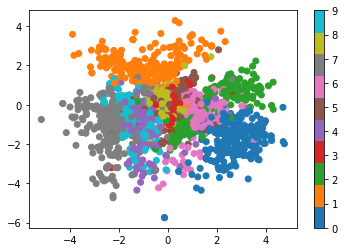

In [13]:
latents = VAE_Encoder.predict(x_test[indices])
plt.scatter(latents[:, 0], latents[:, 1], c=y_test0[indices], cmap="tab10")
plt.colorbar()
plt.show()

In [0]:
max_value_0, min_value_0 = 0.0, 0.0
max_value_1, min_value_1 = 0.0, 0.0

for i in range(60000):
  current = float(VAE_Encoder.predict(x_train[i: i+1])[0][0])
  max_value_0 = [max_value_0,current][max_value_0 < current] 
  min_value_0 = [min_value_0,current][min_value_0 > current] 
  
  current = float(VAE_Encoder.predict(x_train[i: i+1])[0][1])
  max_value_1 = [max_value_1,current][max_value_1 < current] 
  min_value_1 = [min_value_1,current][min_value_1 > current] 

In [41]:
max_value_0, min_value_0 ,max_value_1, min_value_1 



(4.775119304656982, -4.505138397216797, 3.9598402976989746, -5.082347869873047)

以上用很笨的方法找到預測值的最大值還有最小值

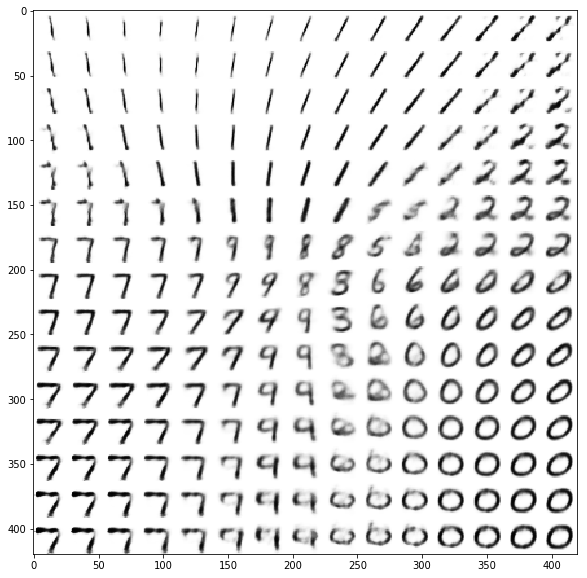

In [47]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(min_value_0, max_value_0, n)
grid_y = np.linspace(min_value_1, max_value_1, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

        
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys')

plt.show()

In [0]:
def inBetween(t,idx_1,idx_2):
    data_0 = x_train0[idx_1]
    data_1 = x_train0[idx_2]
    data_t = (1-t)*x_train0[idx_1] + t*x_train0[idx_2]

    mu_0 = VAE_Encoder.predict(x_train[idx_1:idx_1+1]).squeeze()
    mu_1 = VAE_Encoder.predict(x_train[idx_2:idx_2+1]).squeeze()
    mu_t = (1-t)*mu_0 + t*mu_1

    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 1, 2)
    ax1.scatter(mu_0[0], mu_0[1])
    ax1.scatter(mu_1[0], mu_1[1])
    ax1.plot([mu_0[0],mu_1[0]],[mu_0[1], mu_1[1]])
    ax1.scatter(mu_t[0], mu_t[1])

    ax2 = plt.subplot(2, 3, 1)
    ax2.imshow(data_0, cmap='Greys')

    ax3 = plt.subplot(2, 3, 2)
    ax3.imshow(data_t, cmap='Greys')

    ax4 = plt.subplot(2, 3, 3)
    ax4.imshow(data_1, cmap='Greys')

In [63]:
interact(inBetween, t=FloatSlider(value=0.5, 
                                  min=0, 
                                  max=1.0,
                                  step=0.02,),
        idx_1=IntSlider(value=12345, 
                                  min=0, 
                                  max=59999,
                                  step=1,),
        idx_2=IntSlider(value=54321, 
                                  min=0, 
                                  max=59999,
                                  step=1,))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.02), IntSlider(value=12345, desc…

<function __main__.inBetween>

![](https://i.imgur.com/FwHklk5.png)

nbviewer看不到interact，所以手動貼張圖